# Gradiente: definição

O *operador* gradiente $\nabla$ agrupa as derivadas parciais de uma função $f$ em um vetor. Por exemplo, se $f$ for uma função de duas variáveis ($f(x, y)$ ou algo parecido), o gradiente de $f$ será definido como

$$
\nabla f(x, y) =
\begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} \\
\end{bmatrix}.
$$

Note que atribuímos ao gradiente o título de *operador*. Operadores matemáticos são ferramentas que tomam uma função como entrada e geram uma nova função como saída. No caso do gradiente, nós tomamos uma função real como entrada e geramos uma função vetorial como saída. Em outras palavras: a função $f(x, y)$ tomava dois números reais e gerava um terceiro número real ($R^2 \rightarrow R$), enquanto o gradiente $\nabla f(x, y)$ toma dois números reais e gera um vetor de duas coordenadas ($R^2 \rightarrow R^2$).

Intuitivamente, podemos expandir o conceito de operador gradiente para qualquer dimensão. Se $f$ for uma função de 3 variáveis, o seu gradiente será um vetor com 3 derivadas parciais; para uma função de 1000 variáveis, teremos um vetor com 1000 derivadas parciais, e assim sucetivamente.

Em termos de definição não há muito o que dizer sobre o gradiente além disso: agrupamento vetorial das derivadas parciais de uma função. O que há de interessante são algumas de suas propriedades, principalmente quando observamos o significado geométrico desse operador. Tal interpretação ajuda nos ajuda a consolidar um conhecimento importantíssimo em análise de funções: o conceito de campo, especificamente o vetorial.

A seguir veremos como calcular o gradiente de uma função usando a biblioteca NumPy e como visualizar o resultado em termos de campo vetorial.

# Implementação: `np.gradient` e `plt.quiver`

Para calcular o gradiente, usamos a função `np.gradient` do pacote NumPy. Sua entrada é um conjunto de amostras de uma função $N$-dimensional, e seu retorno será uma lista de tamanho igual a $N$ contendo as derivadas parciais com respeito a cada dimensão. Por ser um método numérico, o retorno da função `np.gradient` já representa o valor de cada derivada parcial em cada ponto do domínio da função. Em outras palavras (e supondo uma função de duas variáveis $f(x, y)$), o retorno de `np.gradient` é calculo de $\frac{\partial f}{\partial x}$ e $\frac{\partial f}{\partial y}$ para cada par $(x, y)$ do domínio de $f$.

Como já temos os vetores em cada ponto do espaço de parâmetros, podemos visualizar o gradiente usando a função `plt.quiver`, que toma como entradas o espaço de parâmetros e os vetores nele contidos. O gradiente, portanto, representa um campo vetorial, um conjunto de vetores posicionados no espaço da função. Analisaremos o significado do campo vetorial gerado pelo gradiente mais a frente.

A seguir temos um exemplo de uso das funções `np.gradient` e `plt.quiver`.

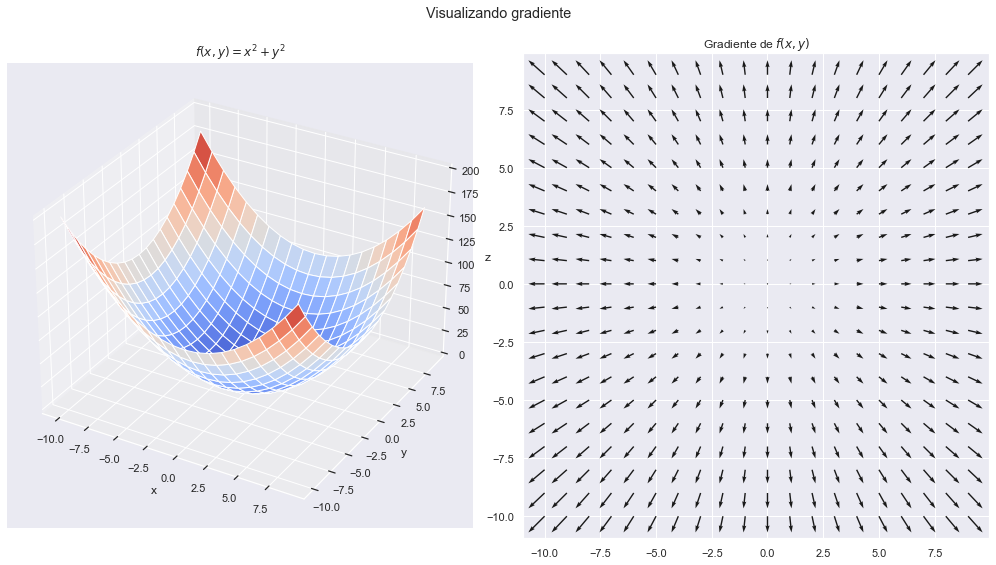

In [22]:
# EXEMPLO: np.gradient e plt.quiver

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# gera espaço de parâmetros usando meshgrid
x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)
xx, yy = np.meshgrid(x, y)

# modela a função f(x, y) = x² + y²
z = xx**2 + yy**2

# calcula o gradiente da função
g = np.gradient(z)

# Visualização
fig = plt.figure(figsize=(14, 8))
fig.suptitle("Visualizando gradiente")

# plot da esquerda: visualizando a função
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(xx, yy, z, cmap="coolwarm")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("$f(x, y) = x^2 + y^2$")

# plot da direita: campo vetorial (gradiente)
ax = fig.add_subplot(1, 2, 2)
ax.quiver(xx, yy, g[1], g[0])
ax.set_title("Gradiente de " + "$f(x, y)$")

plt.tight_layout()
plt.show()

# *"O gradiente sempre aponta para a direção de maior crescimento da função."*

Imagine que os plots da esquerda e direita estão juntos; os vetores do gradiente ficarão posicionados no plano de parâmetros, logo abaixo da superfície da função. Note que os vetores apontam do centro da superfície para fora, na direção das laterais, e que quanto mais longe do centro maiores são as magnitudes desses vetores. Esse comportamento está ligado a uma das mais importantes propriedades do campo vetorial gerado pelo gradiente: *este sempre aponta para a direção de maior crescimento da função*. Como a função se "expande" ao longo dos parâmetros $x$ e $y$ "esticando" sua superfíce para as laterais sempre com valores maiores, o campo vetorial gerado pelo gradiente indicará essa tendência.

Para fechar o conceito, faremos uma nova visualização a seguir, agora com uma função mais complexa. Note que essa nova função contém um mínimo e um máximo locais, e que os vetores do gradiente apontam o caminho que precisamos percorrer para sair do primeiro e chegar no segundo.

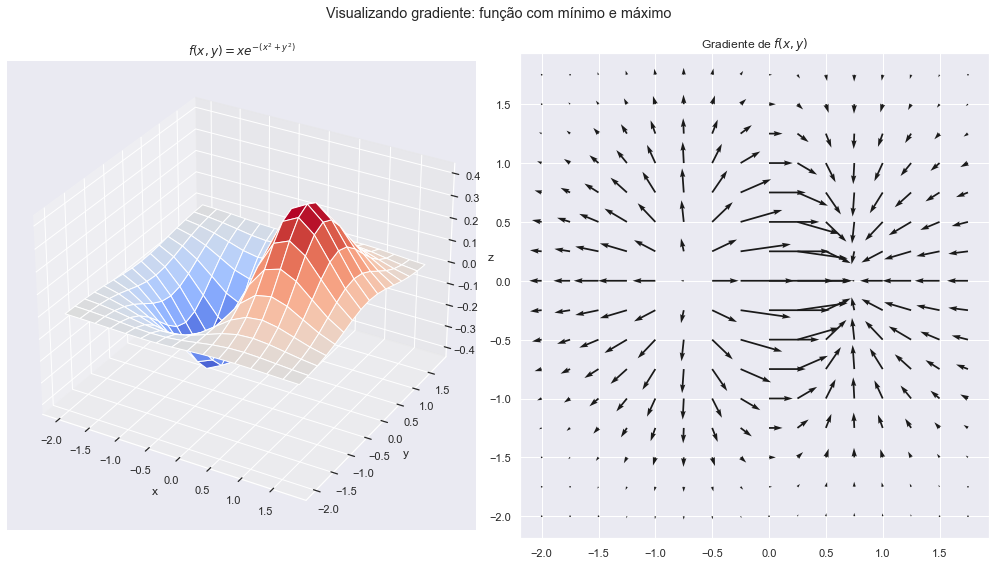

In [29]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# gera espaço de parâmetros usando meshgrid
x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
xx, yy = np.meshgrid(x, y)

z = xx * np.exp(-1*(xx**2 + yy**2))

# calcula o gradiente da função
g = np.gradient(z)

# Visualização
fig = plt.figure(figsize=(14, 8))
fig.suptitle("Visualizando gradiente: função com mínimo e máximo")

# plot da esquerda: visualizando a função
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(xx, yy, z, cmap="coolwarm")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("$f(x, y) = xe^{-(x^2 + y^2)}$")

# plot da direita: campo vetorial (gradiente)
ax = fig.add_subplot(1, 2, 2)
ax.quiver(xx, yy, g[1], g[0])
ax.set_title("Gradiente de " + "$f(x, y)$")

plt.tight_layout()
plt.show()